In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.kernel_sax import KernelSAX
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)


DATA_DIR = "./data/"
IMG_DIR = "./images/"

In [2]:
def load_dataset(file_path: str) -> pd.DataFrame:
    return pd.read_csv(file_path, index_col=0, parse_dates=True)

In [3]:
def test_stationarity(timeseries: pd.Series) -> bool:
    """
    Perform Augmented Dickey-Fuller test to check stationarity.
    """
    result = adfuller(timeseries, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]
    print('Obtained p-value: {:.2f}'.format(p_value))
    if p_value <= 0.05:
        print('Series is stationary')
    else:
        print('Series in non-stationary')
    return p_value <= 0.05  # Stationary if p-value is small

In [4]:
def make_stationary(timeseries: pd.Series) -> pd.Series:
    """
    Apply differencing to make the time series stationary.
    """
    return timeseries.diff().dropna()

In [5]:
def process_time_series(file_path: str, col: str) -> pd.Series:
    """
    Main function to process the time series data.
    """
    # Load data
    data = load_dataset(file_path)
    timeseries = data[col]

    # Check stationarity
    if test_stationarity(timeseries):
        print("Time series is already stationary.")
        return timeseries
    else:
        print("Time series is not stationary. Making it stationary...")
        stationary_series = make_stationary(timeseries)
        return stationary_series

In [13]:
data = process_time_series(DATA_DIR+"ETT-small/ETTh1.csv", col='OT')
data.head()

Obtained p-value: 0.01
Series is stationary
Time series is already stationary.


date
2016-07-01 00:00:00    30.531000
2016-07-01 01:00:00    27.787001
2016-07-01 02:00:00    27.787001
2016-07-01 03:00:00    25.044001
2016-07-01 04:00:00    21.948000
Name: OT, dtype: float64

<Axes: xlabel='date'>

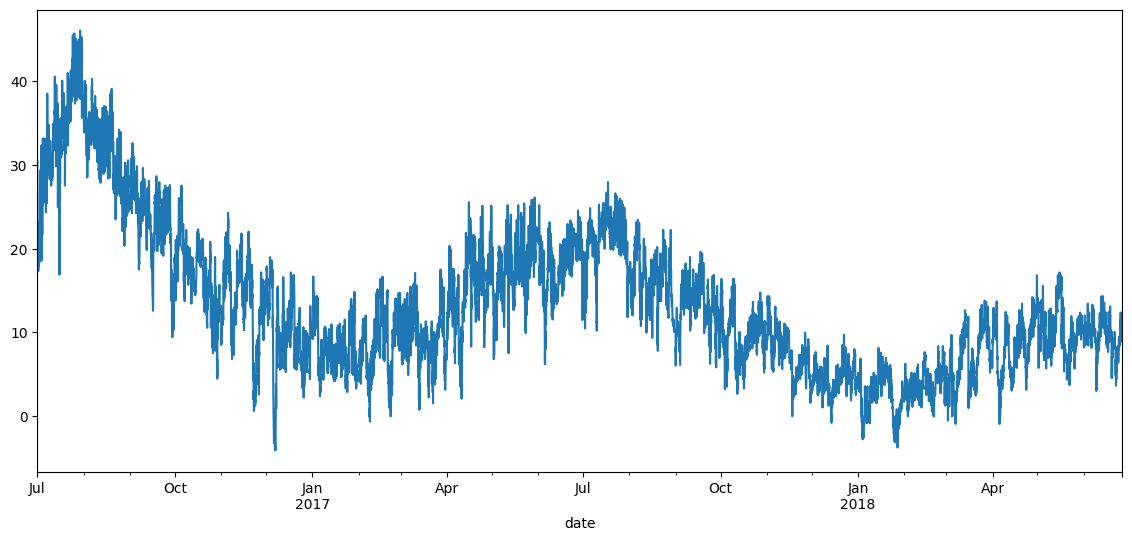

In [14]:
data.plot()

In [8]:
data = make_stationary(data)

<Axes: xlabel='date'>

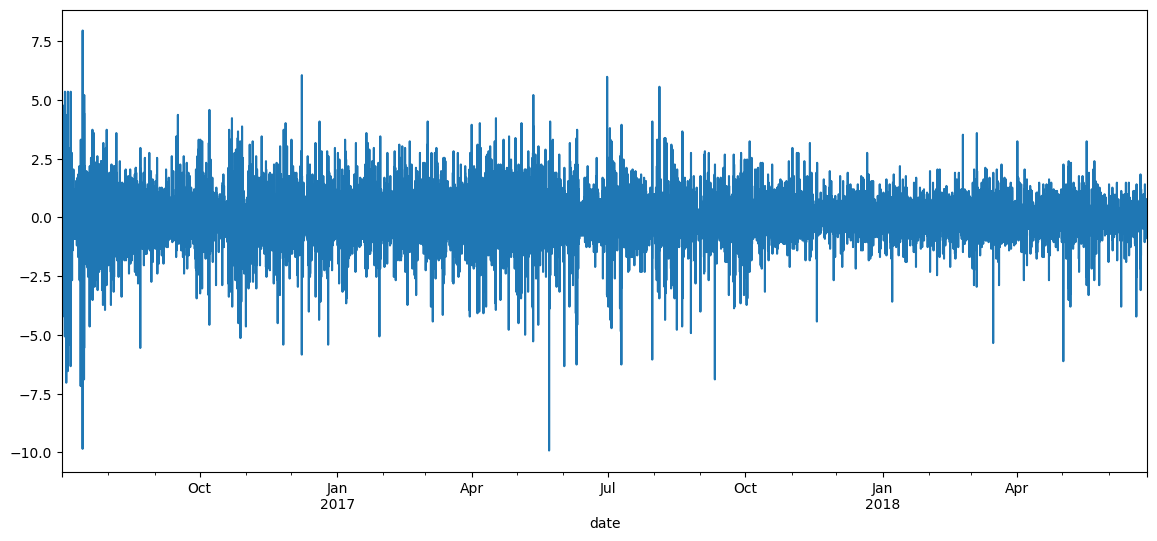

In [9]:
data.plot()

In [15]:
str(data.index[0])

'2016-07-01 00:00:00'

/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator = integrate.quad(
/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  denominator = integrate.quad(self.density_func, bi, bi_plus_1)[0]
/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-th

Epoch 1, Boundaries delta: 18.2837127738, Codewords delta: 7.6497524668
Epoch 2, Boundaries delta: 3.0765439075, Codewords delta: 1.8330564847
Epoch 3, Boundaries delta: 1.2897064820, Codewords delta: 1.0255805049
Epoch 4, Boundaries delta: 0.8321941708, Codewords delta: 0.6927926816
Epoch 5, Boundaries delta: 0.5919031823, Codewords delta: 0.5126946680
Epoch 6, Boundaries delta: 0.4527891574, Codewords delta: 0.4100754566
Epoch 7, Boundaries delta: 0.3720386647, Codewords delta: 0.3432976334
Epoch 8, Boundaries delta: 0.3129460522, Codewords delta: 0.2915448587
Epoch 9, Boundaries delta: 0.2692993096, Codewords delta: 0.2514641411
Epoch 10, Boundaries delta: 0.2336126932, Codewords delta: 0.2185543307
Epoch 11, Boundaries delta: 0.2038278785, Codewords delta: 0.1913535355
Epoch 12, Boundaries delta: 0.1800853086, Codewords delta: 0.1682554409
Epoch 13, Boundaries delta: 0.1598143563, Codewords delta: 0.1501736162
Epoch 14, Boundaries delta: 0.1423530921, Codewords delta: 0.1347165672


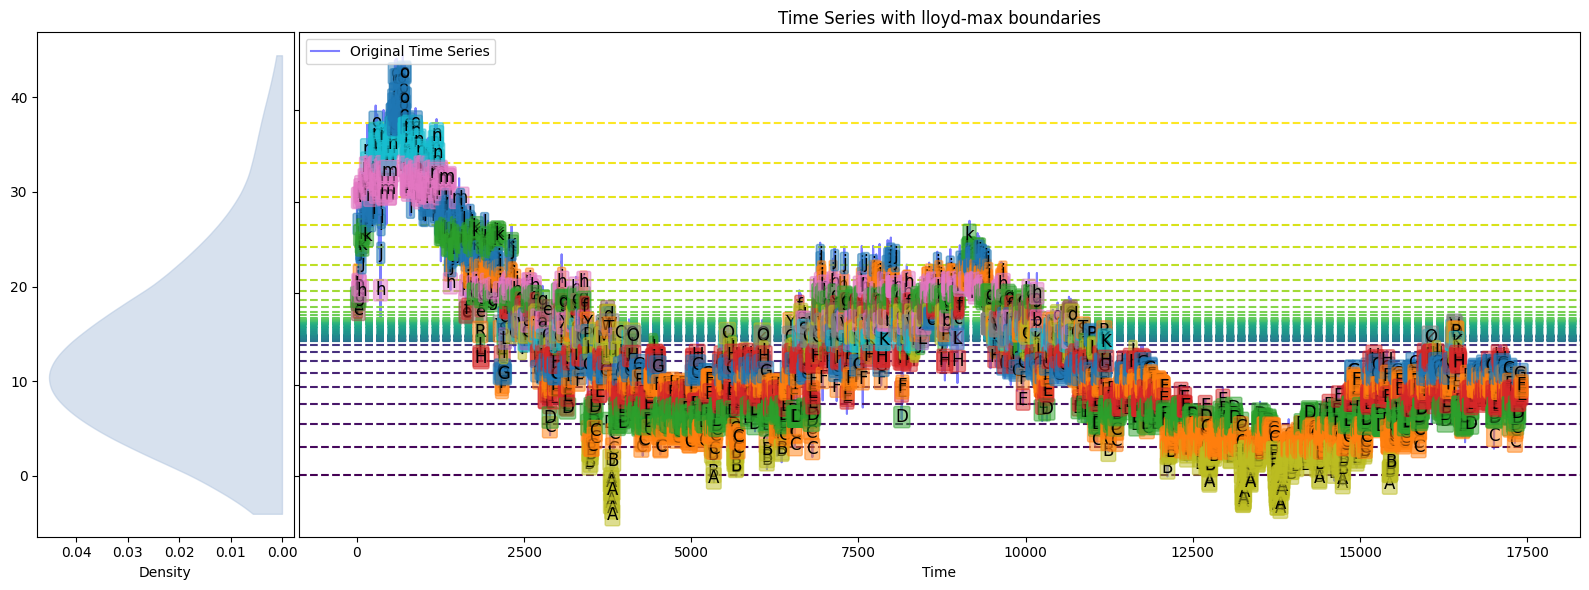

In [16]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=52, bandwidth=10, epochs=70, paa_window_size=4)
kernel_sax.fit(data.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETTh1_lloyd.png")
kernel_sax.save_alphabets(DATA_DIR+"ETTh1_lloyd.txt")
kernel_sax.text_to_df(start_datetime=str(data.index[0]), csv_path=DATA_DIR+"ETTh1_lloyd.csv")

In [17]:
new_data = pd.read_csv(DATA_DIR+"ETTh1_lloyd.csv", index_col='timestamp')

<Axes: xlabel='timestamp'>

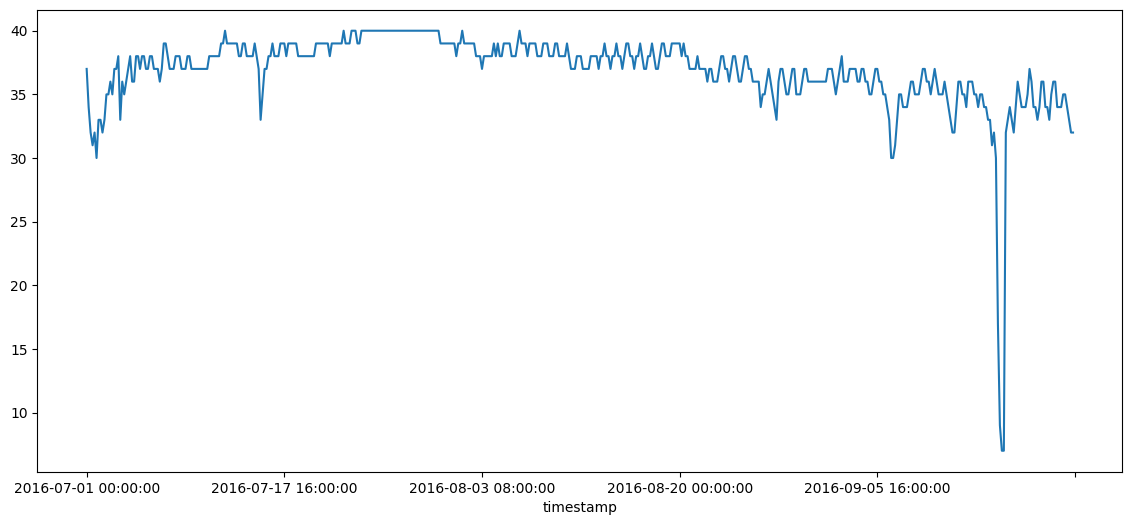

In [20]:
new_data['encoded_alphabets'][:500].plot()

In [12]:
def load_text_data(file_path: str) -> str:
    """
    Load character level text data from a file.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        text_data = file.read()
    return text_data

In [ ]:
def split_text_data(text_data: str, train_ratio: float=0.8) -> tuple:
    """
    Split text data into train and test datasets sequentially.
    
    :param text_data: The complete character-level text data.
    :param train_ratio: Ratio of data to be used for training (default is 0.8).
    :return: train_data, test_data
    """
    # Calculate the split index
    split_index = int(len(text_data) * train_ratio)
    
    # Split the data
    train_data = text_data[:split_index]
    test_data = text_data[split_index:]
    
    return train_data, test_data

In [13]:
ETTh1_text_data = load_text_data(DATA_DIR + 'ETTh1_lloyd.txt')

In [ ]:
ETTh1_text_data[:100]

In [ ]:
ETTh1_train, ETTh1_test = split_text_data(ETTh1_text_data)
print(f"Train text len: {len(ETTh1_train)}, test text len: {len(ETTh1_test)}")

In [ ]:
def calculate_vocab_size(text_data):
    """
    Calculate the vocabulary size from the text data.
    """
    return len(set(text_data))

def suggest_sequence_length(text_data, num_samples=1000):
    """
    Suggest a sequence length based on the average length of sentences/phrases in the text data.
    """
    # Split the text into sentences or phrases
    sentences = text_data.split('\n')  # Assuming each line is a sentence/phrase
    sample_sentences = sentences[:num_samples]  # Sample a subset for analysis

    # Calculate average length
    avg_length = sum(len(sentence) for sentence in sample_sentences) / len(sample_sentences)
    return int(avg_length)

# Usage with the training data
vocab_size = calculate_vocab_size(ETTh1_train)
suggested_seq_len = suggest_sequence_length(ETTh1_train)

print(vocab_size, suggested_seq_len)


In [ ]:
def save_data_to_file(data: list, file_path: str) -> None:
    """
    Save the given data to a text file.

    Args:
        data (str): The text data to be saved.
        file_path (str): Path of the file where the data will be saved.
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(data)
    print(f"Saved data to {file_path}")

# Usage
train_file_path = DATA_DIR +  'ETTh1_train.txt'  
test_file_path = DATA_DIR + 'ETTh1_test.txt'   

# Saving the data
save_data_to_file(ETTh1_train, train_file_path)
save_data_to_file(ETTh1_test, test_file_path)

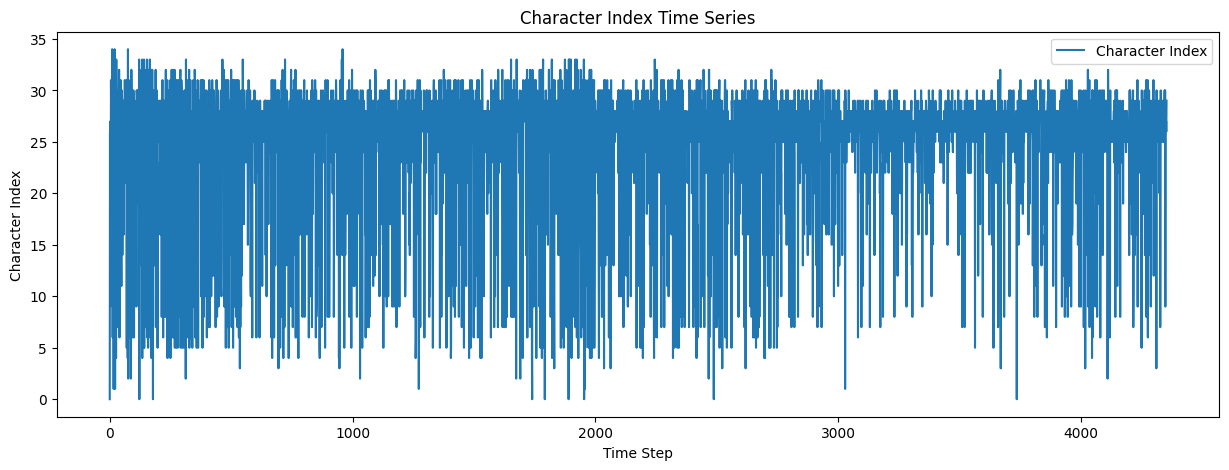

In [17]:
char_to_idx = {char: idx for idx, char in enumerate(sorted(set(ETTh1_text_data)))}

# Convert all characters in the data to their corresponding index
indexed_data = [char_to_idx[char] for char in ETTh1_text_data]

# Creating a DataFrame for plotting
df = pd.DataFrame(indexed_data, columns=['Character Index'])

# Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Character Index'], label='Character Index')
plt.title('Character Index Time Series')
plt.xlabel('Time Step')
plt.ylabel('Character Index')
plt.legend()
plt.show()